# Assignment 1
### The assignment is due 28 April, Friday, at 23:59.

**Note:** The assignment is to be done individually. You are going to submit the **report** and **code** separately. Please do not include codes in the report. Your report should be self-contained, i.e. explain what you are doing, put the resulting graphs, the hyperparameters that you use, and write your observations.

**Note:** This assignment worth 10% of overall course grade.

In this assignment, you are going to work with synthetic data, i.e. the data that you generate yourselves.  You will not separate this data into train and test set. Instead see the results on the training set itself.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import operator

## Question 1 [25 pts]

In this question you are going to generate and work with synthetic data. The main goal is to gain understanding of Linear and Polynomial Regressions. In the first question of the assignment you are free to use python models (linear regression, polynomial features, etc.).

Generate synthetic data using a function  y=sin⁡(2πx)+ε, where m=10 (number of training examples) and ε is a random noise. You will not separate this data into train and test set. Instead see the result on the train set itself.

[[ 0.43573072]
 [ 0.51135514]
 [ 1.71536144]
 [ 1.17012248]
 [ 0.77372951]
 [ 0.58864379]
 [ 1.17235508]
 [-0.84246789]
 [-0.21542931]
 [-2.2690638 ]]


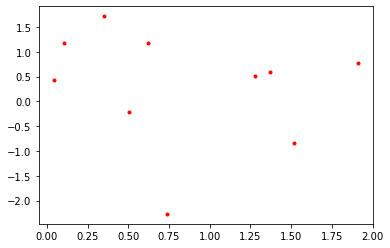

In [16]:

m=10;
X=np.random.rand(m,1)*2
y = np.sin(2*np.pi*X)+np.random.randn(m,1)
# You can use print to see what is X
print(y)    
plt.plot(X,y,"r.")
plt.show()

### Question1 (a) [15 pts]
Apply d-order polynomial model to the data set where d=0,1,3,9 (you can use PolynomialFeatures and LinearRegression class of Scikit). Plot on the same figure the data and the curves resulting from your fit for various d (0,1,3,9) values. Comment on the results for various d.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()



#   Write your code here




Plot the result in one graph. Below you can find an example of plotting the curve that fit your data with d=3.

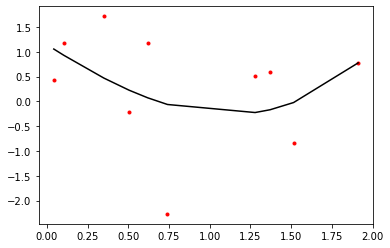

In [18]:
plt.plot(X,y,"r.")


sorted_zip = sorted(zip(X,y_predict3))
X3, y_predict3 = zip(*sorted_zip)
plt.plot(X3, y_predict3, color='k')

plt.show()

### Question 1 (b) [10 pts]
Increase the number of training examples to m=100. Repeat the steps done in (I). Comment briefly on what changed with the increase of m. What problems you encountered with large d in previous case? Is it resolved with m=100? Can you derive any conclusions from the results with increased number of samples?

## Question 2 [25 pts]
Generate synthetic data using a function y=100+3x+ε, where m=100 (number of training examples) and ε is a random noise


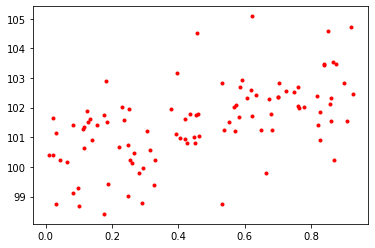

In [19]:
m=100;
X=np.random.rand(m,1)
y=100+3*X+np.random.randn(m,1)
plt.plot(X,y,'r.')


### Question 2 (a) [15 pts]

Implement linear regression (y=θ^T x) on this dataset using batch gradient descent. You are expected to write a separate function for linear regression that is expected to return thetas (parameters): 
theta= linear_regression(X, y, iterNo, eta); 
where, X is a matrix of features, y is target variables vector, iterNo is number of iterations and eta is learning rate. You can set eta=0.1, and iterNo=1000;

Plot on the same figure the data and the straight line resulting from your fit. (Remember to include the intercept term). Give the function that was fit to your data (in other words give your hypothesis).


In [28]:
def linear_regression(X,y,iterNo,eta):
   
    m = np.shape(X)[0]          # Number of training samples
    X = np.c_[np.ones((m,1)),X] # Adding intercept term to the data
    n = np.shape(X)[1]          # Number of features
     
    #  Write your code here 
    
    
    return theta,MSE

In [29]:
theta, MSE=linear_regression(X,y, 1000,0.1)

In [30]:
theta

array([[100.21186249],
       [  2.73327357]])

In [25]:
X_b = np.c_[np.ones((m,1)),X]
y_predict=X_b.dot(theta);

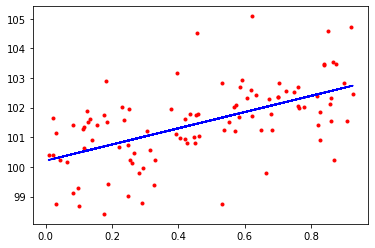

In [26]:
plt.plot(X,y,"r.")
plt.plot(X,y_predict,"b-")
plt.show()

### Question 2 (b)  [10 pts]

Include to your linear_regression function statements that compute MSE for each iteration. Then update the return parameters so that the function also returns MSEs for every iteration. Plot the results for eta=0.1. Then try linear regression for eta=0.001, 0.01 and 0.5, while keeping iterNo fixed to 1000. Plot the results for every eta and also report on the hypothesis function that it learns for every eta. Discuss briefly on the results.

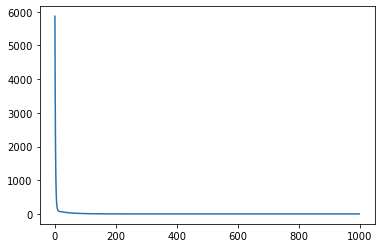

In [31]:
iterNo=np.arange(1000)
plt.plot(iterNo,MSE)
plt.show()


## Question 3 [ 50pts] 

#### Locally Weighted Linear Regression
In this part of the assignment you are going to implement locally weighted linear regression. Generate synthetic data using a function  y=sin⁡(2πx)+ε, where m=100 (number of training examples) and ε is a random noise.



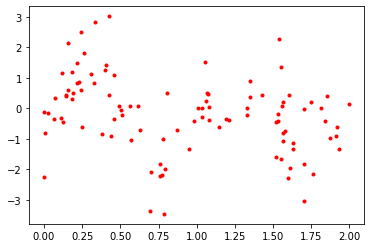

In [39]:
m=100;
X=np.random.rand(m,1)*2
y = np.sin(2*np.pi*X)+np.random.randn(m,1)
plt.plot(X,y,'r.')

### Question 3 (a) [30 pts]

Update the linear regression function that you implemented in (2) so that local weights are also considered in taking the gradient of a cost function. The function should have the following header:
theta= weighted_linear_regression(X, Y, iteration_cnt, eta, x, tau)
where x is a query point, tau is bandwidth parameter.
Use eta=0.4 and iterNo=100. 
When evaluating h(·) at a query point x, use weights
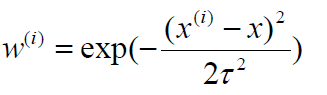

Below you can find a computeWeights function that computes thw weights of all samples in X with respect to the query sample testx. With a bandwidth parameter τ=0.1. (Again, remember to include intercept term). Plot on the same figure the data and the curve resulting from your fit.

In [40]:
def computeWeights(X,testx,tau):
    weights=np.exp(-((X-testx)*(X-testx))/(2*tau**2))
    return weights

In [41]:
def weighted_linear_regression(X,y,iterNo,testx,eta,tau):
   
    
    # Write your code here 
        
    return theta

**Note:** The query samples are the samples coming from training set itself. Since you have 100 samples in your training set you will call weighted_linear_regression 100 times, each time selecting one of the samples from your training set. 
Below you can find a code that is calling weighted_linear_regression m times. 

In [42]:
eta=0.4
tau = 0.1
iteration_cnt = 100
y1_predict =np.zeros((m,1))
i=0
for x in X:
    theta = weighted_linear_regression(X, y, iteration_cnt, x, eta, tau)
    xt=np.c_[1,x]
    pred=xt.dot(theta)
    y1_predict[i]=pred
    i=i+1
    


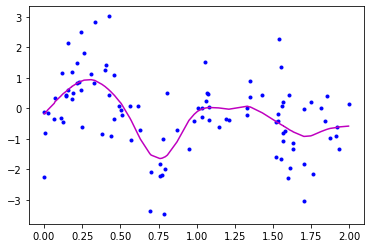

In [43]:

plt.plot(X, y, "b.") # These are original points that will occur as a blue dot

sorted_zip = sorted(zip(X,y1_predict)) # Want to sort according to X
X, y1_predict = zip(*sorted_zip)   # y1_predict is my predicted y, X is the original X I obtained via X=np.random.rand(m,1)*2
plt.plot(X, y1_predict, color='m')
plt.show()

### Question 3 [20 pts]
Repeat (a) five times with τ=0.001,0.01,0.3 ,1 and 10. Comment briefly on what happens to the fit when τ is too small or too large. Given the fixed parameters for learning rate and number of iterations as above, what is the best tau to fit your synthetic data?